In [496]:
# common 
import os
import numpy as np
import pandas as pd

# encoder
from sklearn.preprocessing import LabelEncoder

# splitting the data
from sklearn.model_selection import train_test_split

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# model
from sklearn.ensemble import RandomForestRegressor

# evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


# fine tuning
from sklearn.model_selection import GridSearchCV


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
from datetime import date
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import os


# warnings
import warnings
warnings.filterwarnings('ignore')

In [497]:
df=pd.read_csv('Data\salary.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [498]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [499]:
#because we are not racists
df.drop(['race'],axis=1,inplace=True)

In [500]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [501]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [502]:
df.salary.value_counts()

salary
 <=50K    24720
 >50K      7841
Name: count, dtype: int64

In [503]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [504]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [505]:
df.drop(['fnlwgt'],axis=1,inplace=True)

In [506]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [507]:
df.sex.value_counts()

sex
 Male      21790
 Female    10771
Name: count, dtype: int64

In [508]:
#need change marital-status
df['marital-status'].value_counts()
#rename marital-status
df.rename(columns={'marital-status':'marital_status'},inplace=True)
df.marital_status.value_counts()

marital_status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64

In [509]:
# "Married" ve "Single" olmak üzere iki kategoriye ayırmak için bir işlev tanımlıyoruz
def marital_status_category(status):
    if status in [" Married-civ-spouse", " Married-spouse-absent", " Married-AF-spouse"]:
        return "Married"
    elif status in [" Never-married", " Divorced", " Separated", " Widowed"]:
        return "Single"
    else:
        return status

# "marital-status" değişkenindeki verileri "Married" ve "Single" kategorilerine ayırıyoruz
df["marital_status"] = df["marital_status"].apply(marital_status_category)
df["marital_status"].value_counts()


marital_status
Single     17144
Married    15417
Name: count, dtype: int64

In [510]:
df.occupation.value_counts()

occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64

In [511]:
#drop occupation when occupation=?
df=df[df.occupation != ' ?']
df.occupation.value_counts()

occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64

In [512]:
df.education.value_counts()

education
 HS-grad         9968
 Some-college    6775
 Bachelors       5182
 Masters         1675
 Assoc-voc       1321
 11th            1056
 Assoc-acdm      1020
 10th             831
 7th-8th          573
 Prof-school      558
 9th              463
 Doctorate        398
 12th             393
 5th-6th          303
 1st-4th          156
 Preschool         46
Name: count, dtype: int64

In [513]:
def education_category(edu):
    if edu in [" Bachelors", " Masters", " Assoc-voc", " Assoc-acdm", " Prof-school", " Doctorate"]:
        return "Graduated"
    elif edu in [" HS-grad", " Some-college", " 11th", " 10th", " 7th-8th", " 9th", " 12th", " 5th-6th", " 1st-4th", " Preschool"]:
        return "Not Graduated"
    else:
        return edu

# "education" değişkenindeki verileri "Graduated" ve "Not Graduated" kategorilerine ayırıyoruz
df["education"] = df["education"].apply(education_category)
df["education"].value_counts()

education
Not Graduated    20564
Graduated        10154
Name: count, dtype: int64

In [514]:
df.drop(['education-num'],axis=1,inplace=True)
df.head()

,age,workclass,education,marital_status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Graduated,Single,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Graduated,Married,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,Not Graduated,Single,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,Not Graduated,Married,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,Graduated,Married,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [515]:
df.relationship.value_counts()

relationship
 Husband           12704
 Not-in-family      7865
 Own-child          4525
 Unmarried          3271
 Wife               1435
 Other-relative      918
Name: count, dtype: int64

In [516]:
#drop relationship because its same with marital-status
df.drop(['relationship'],axis=1,inplace=True)
df.head()

,age,workclass,education,marital_status,occupation,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Graduated,Single,Adm-clerical,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Graduated,Married,Exec-managerial,Male,0,0,13,United-States,<=50K
2,38,Private,Not Graduated,Single,Handlers-cleaners,Male,0,0,40,United-States,<=50K
3,53,Private,Not Graduated,Married,Handlers-cleaners,Male,0,0,40,United-States,<=50K
4,28,Private,Graduated,Married,Prof-specialty,Female,0,0,40,Cuba,<=50K


In [517]:
#rename capital-gain and capital-loss
df.rename(columns={'capital-gain':'capital_gain'},inplace=True)
df.rename(columns={'capital-loss':'capital_loss'},inplace=True)
df.head()


,age,workclass,education,marital_status,occupation,sex,capital_gain,capital_loss,hours-per-week,native-country,salary
0,39,State-gov,Graduated,Single,Adm-clerical,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Graduated,Married,Exec-managerial,Male,0,0,13,United-States,<=50K
2,38,Private,Not Graduated,Single,Handlers-cleaners,Male,0,0,40,United-States,<=50K
3,53,Private,Not Graduated,Married,Handlers-cleaners,Male,0,0,40,United-States,<=50K
4,28,Private,Graduated,Married,Prof-specialty,Female,0,0,40,Cuba,<=50K


In [518]:
df.capital_gain.value_counts()


capital_gain
0        28129
15024      343
7688       278
7298       244
99999      155
         ...  
6097         1
2538         1
401          1
1455         1
1086         1
Name: count, Length: 118, dtype: int64

In [519]:
df.capital_loss.value_counts()

capital_loss
0       29257
1902      199
1977      167
1887      157
1848       50
        ...  
2457        1
4356        1
1539        1
1844        1
1411        1
Name: count, Length: 90, dtype: int64

In [520]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30718 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30718 non-null  int64 
 1   workclass       30718 non-null  object
 2   education       30718 non-null  object
 3   marital_status  30718 non-null  object
 4   occupation      30718 non-null  object
 5   sex             30718 non-null  object
 6   capital_gain    30718 non-null  int64 
 7   capital_loss    30718 non-null  int64 
 8   hours-per-week  30718 non-null  int64 
 9   native-country  30718 non-null  object
 10  salary          30718 non-null  object
dtypes: int64(4), object(7)
memory usage: 2.8+ MB


In [521]:
x = df.drop(['workclass','education','sex','marital_status','occupation','native-country','salary'],axis=1)
dms = pd.get_dummies(df[['workclass','sex','education','marital_status','occupation','native-country']])

In [522]:
dms

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,sex_ Female,sex_ Male,education_Graduated,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,False,False,False,False,False,True,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,True,False,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
2,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,True,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,True,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,True,False,False
32557,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
32558,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32559,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [523]:
x

,age,capital_gain,capital_loss,hours-per-week
0,39,2174,0,40
1,50,0,0,13
2,38,0,0,40
3,53,0,0,40
4,28,0,0,40
...,...,...,...,...
32556,27,0,0,38
32557,40,0,0,40
32558,58,0,0,40
32559,22,0,0,20


In [524]:
X = pd.concat([x,dms],axis=1)
Y = df['salary']

In [525]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.35, random_state=42)

In [526]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [527]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [528]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier().fit(X_train,y_train)
y_pred = gbm.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.87      0.95      0.91      8053
        >50K       0.79      0.58      0.67      2699

    accuracy                           0.86     10752
   macro avg       0.83      0.77      0.79     10752
weighted avg       0.85      0.86      0.85     10752



In [529]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(verbose=False).fit(X_train,y_train)
y_pred = cat.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      8053
        >50K       0.78      0.63      0.70      2699

    accuracy                           0.86     10752
   macro avg       0.83      0.79      0.80     10752
weighted avg       0.86      0.86      0.86     10752



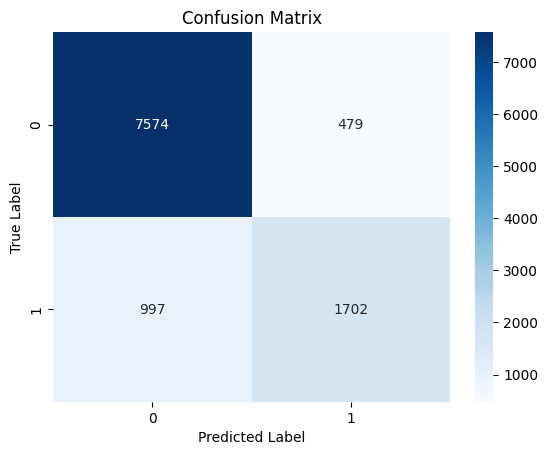

In [530]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [531]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      8053
        >50K       0.69      0.60      0.64      2699

    accuracy                           0.83     10752
   macro avg       0.78      0.76      0.77     10752
weighted avg       0.83      0.83      0.83     10752



<function matplotlib.pyplot.show(close=None, block=None)>

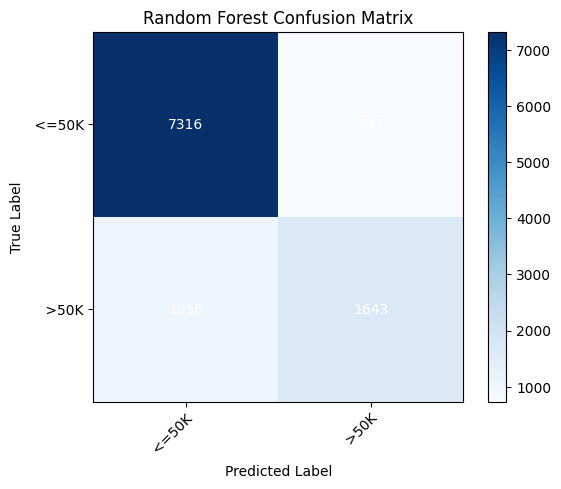

In [532]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

rf = RandomForestClassifier().fit(X_train,y_train)
y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
classes = np.unique(y_test)

fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')

# Set ticks and tick labels
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations
for i in range(len(classes)):
    for j in range(len(classes)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")

# Set title and axis labels
ax.set_title("Random Forest Confusion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")

# Create a colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Display the plot
plt.show


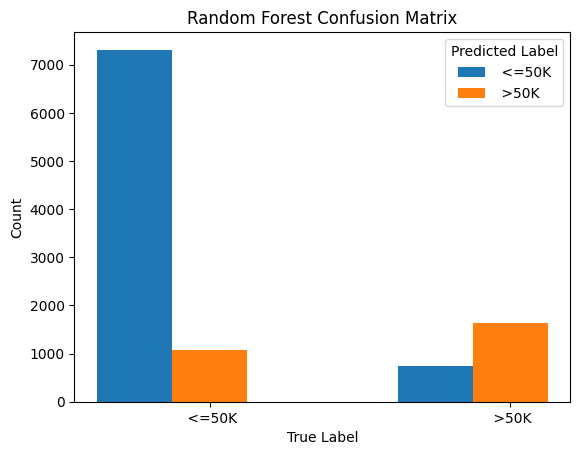

In [533]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

rf = RandomForestClassifier().fit(X_train,y_train)
y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
classes = np.unique(y_test)

fig, ax = plt.subplots()
width = 0.5
ind = np.arange(len(classes))

# Create a bar plot for each class
for i in range(len(classes)):
    ax.bar(ind + i*width/len(classes), cm[i,:], width/len(classes),
           label=classes[i])

# Set x-axis ticks and tick labels
ax.set_xticks(ind + width/2)
ax.set_xticklabels(classes)

# Set title, axis labels, and legend
ax.set_title("Random Forest Confusion Matrix")
ax.set_xlabel("True Label")
ax.set_ylabel("Count")
ax.legend(title="Predicted Label")

# Display the plot
plt.show()
